1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [20]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

###Generating the dataset
N = 1000
x = np.random.normal(loc = 0, scale = 1, size = N)
y = x + np.random.normal(loc = 0, scale = 3, size = N)
z = 2*x + y
v =np.array([x,y,z])

###Eingenvectors and eigenvalues with covariance matrix eigendecomposition
cov = np.cov(v)
l, V = la.eig(cov)
l = np.real_if_close(l)
print("Eigenvalues using covariance matrix decomposition: \n\n", l, "\n")
print("Eigenvectors using covariance matrix decomposition: \n\n", V, "\n")

###Eigenvectors and eigenvalues with SVD
U, S, Vt = la.svd(cov)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

###Dataset variability
Lambda = np.diag(l)
perc = (Lambda[0,0]/Lambda.trace())*100
print("The %.2f%% of the total variability is explained" % (perc))
#Considering N = 1000, the result is around 93%

exp_var = []
Lambda = np.diag(l)
for li in l:
    exp_var.append(li/Lambda.trace())

Eigenvalues using covariance matrix decomposition: 

 [ 2.88973327e+01 -4.85045206e-17  1.95546691e+00] 

Eigenvectors using covariance matrix decomposition: 

 [[-0.11079417 -0.81649658  0.56661979]
 [-0.58317051 -0.40824829 -0.70231438]
 [-0.80475885  0.40824829  0.4309252 ]] 

shapes: U = (3, 3) D: (3,) V^T: (3, 3) 

Spectrum:
 [2.88973327e+01 1.95546691e+00 7.61613338e-17] 

U:
 [[-0.11079417  0.56661979 -0.81649658]
 [-0.58317051 -0.70231438 -0.40824829]
 [-0.80475885  0.4309252   0.40824829]] 

V^T:
 [[-0.11079417 -0.58317051 -0.80475885]
 [ 0.56661979 -0.70231438  0.4309252 ]
 [-0.81649658 -0.40824829  0.40824829]] 

The 93.66% of the total variability is explained


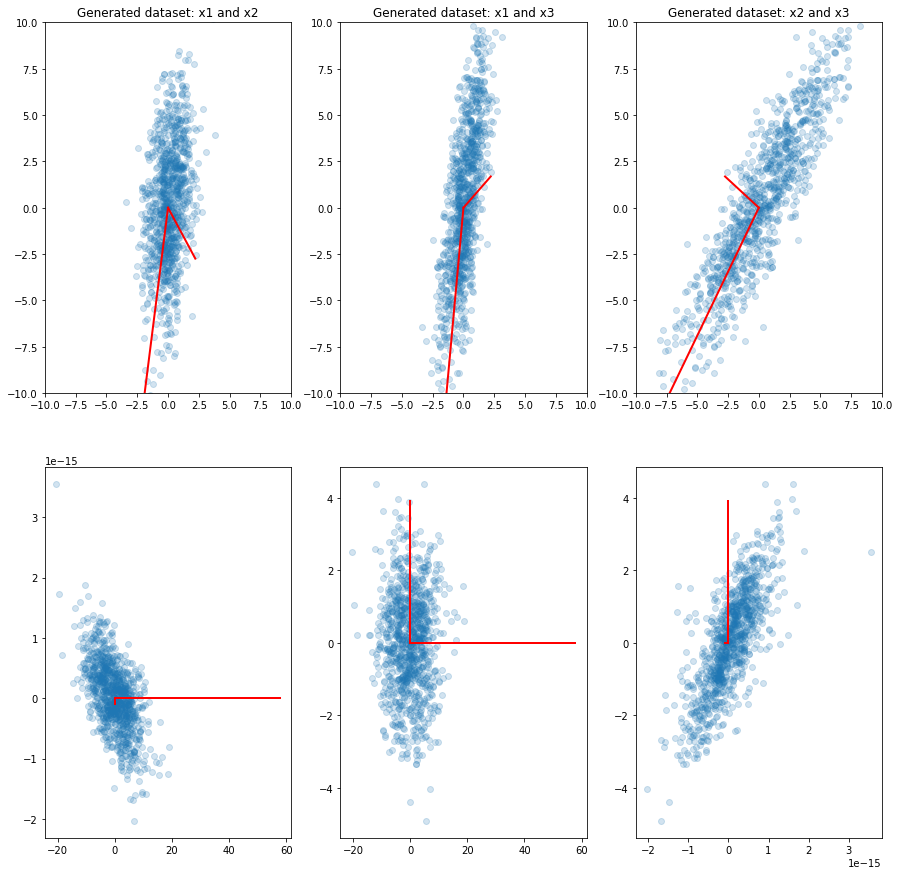

In [32]:
###Redefine data using PCA base

Xp = np.dot(V.T, v)

#Setting plot display
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize = (15,15))
ax1.scatter(v[0,:], v[1,:], alpha = 0.2)
ax1.set_title("Generated dataset: x1 and x2")
ax1.axis([-10,10,-10,10])

ax2.scatter(v[0,:], v[2,:], alpha = 0.2)
ax2.set_title("Generated dataset: x1 and x3")
ax2.axis([-10,10,-10,10])

ax3.scatter(v[1,:], v[2,:], alpha = 0.2)
ax3.set_title("Generated dataset: x2 and x3")
ax3.axis([-10,10,-10,10])

scale_factor = 2

for li, vi in zip(l, V.T):
    ax1.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)
    ax2.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[2]], 'r-', lw=2)
    ax3.plot([0, scale_factor * li * vi[1]], [0, scale_factor * li * vi[2]], 'r-', lw=2)

#Redefining the plots according to the rotated data
ax4.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
ax5.scatter(Xp[0,:], Xp[2,:], alpha=0.2)
ax6.scatter(Xp[1,:], Xp[2,:], alpha=0.2)

for li, vi in zip(l, np.diag([1]*len(l))):
    ax4.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
    ax5.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[2]], 'r-', lw=2)
    ax6.plot([0, scale_factor*li*vi[1]], [0, scale_factor*li*vi[2]], 'r-', lw=2)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [25]:
#setting data as requested by the exercise

sigma = 1/20
noise = [np.random.normal(loc = i, scale = sigma, size = N) for i in range(10)]
new_data = v + noise
#print(new_data)
new_cov = np.cov(new_data)
new_l, new_V = la.eig(new_cov)
new_l = np.real_if_close(new_l)
print("New eigenvalues with noise: ", new_l)
print("New eigenvectors with noise: ", new_V)

New eigenvalues with noise:  [ 2.62764098e+01  1.93589910e+00 -1.45603036e-15  2.94876559e-03
  2.75886507e-03  2.11586468e-03  2.68928946e-03  2.60693789e-03
  2.52561306e-03  2.19441714e-03  2.22963626e-03  2.40141325e-03
  2.36717288e-03]
New eigenvectors with noise:  [[-1.15211947e-01 -5.65736118e-01  8.16496581e-01 -4.90187086e-04
   7.46349252e-04 -2.37689946e-04 -3.15187101e-04 -7.78643020e-04
   2.19074428e-04  6.30263463e-04 -1.70082626e-04 -2.28792354e-04
  -3.15194985e-04]
 [-5.77672064e-01  7.06840269e-01  4.08248290e-01  8.37894879e-04
  -9.72206001e-04  4.41795936e-05  2.21474415e-04  6.56137198e-04
  -1.71998901e-04 -1.03745562e-03  6.84328352e-04  4.14394517e-04
   1.13125559e-03]
 [-8.08095958e-01 -4.24631968e-01 -4.08248290e-01 -1.42479292e-04
   5.20492503e-04 -4.31200298e-04 -4.08899787e-04 -9.01148841e-04
   2.66149954e-04  2.23071305e-04  3.44163100e-04 -4.31901898e-05
   5.00865623e-04]
 [-4.47709834e-04 -1.59536011e-04 -4.59700561e-16  3.63270953e-01
  -1.146662

3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [9]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/ --no-check-certificate
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ --no-check-certificate

C:\Users\Matte\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PC1'>

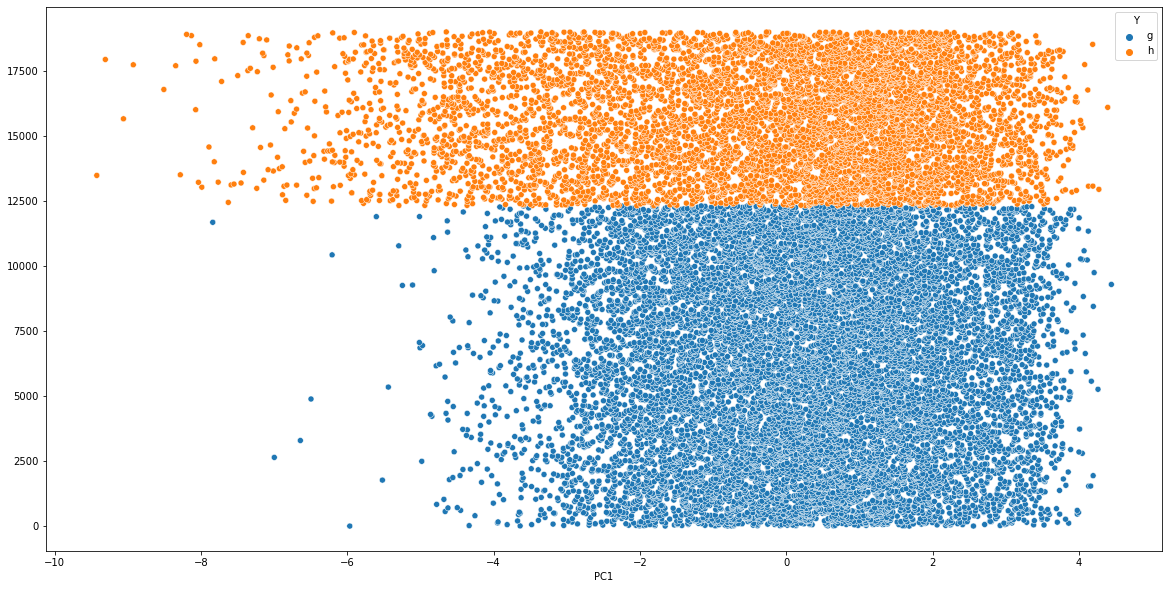

In [19]:
import pandas as pd

#importing the file and setting up the dataframe
data = pd.read_csv('data/magic04.data', delimiter = ",")
#attributes got from the names file
#!type data\magic04.names
attributes = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
data.columns = attributes
df = data.copy()
del data["class"]
#data.drop(columns = ['class'], axis=1)

#print(df)
features = data.values.tolist()

#print(features)

#data scaling
from sklearn.preprocessing import StandardScaler
f_scaled = StandardScaler().fit_transform(features)

#covariance matrix
f = f_scaled.T
cov_matrix = np.cov(f)

#Eigendecomposition
values, vectors = np.linalg.eig(cov_matrix)
#print("Eigenvalues: ", values)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))

pro_1 = f_scaled.dot(vectors.T[0])
pro_2 = f_scaled.dot(vectors.T[1])

print()

res = pd.DataFrame(pro_1, columns = ['PC1'])
res['PC2'] = pro_2
res['Y'] = df['class']
res

import matplotlib.pyplot as plt
import seaborn as sns

y = [i for i in range(len(res))]

plt.figure(figsize = (20,10))
sns.scatterplot(res['PC1'], y, hue = res['Y'], sizes = 200)
